# Studycat Experience Data

## Product

Studycat creates mobile language learning games for children aged 3-10.

Put some pics or vids in here.

During each game the users may (or may not) be challenged to pick the right word from a set of candidates. We focus on these cases in this task - predicting the accuracy of those "tests." We believe it should be more reliable than predicting the score.

## Purpose

Our goal: **to create a personalized learning experience best suited to each learner**. We therefore want to know what correlates to good performance. This means a focus on **interpretability** of results. We could try a big neural network and maybe we could get low prediction error, but that may not tell us anything useful (however it might if you design a neural network with, say, interpretable attention mechanisms).

## Data

This section introduces the data and features.

In [73]:
from sml import exp_data, viz, util
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# this function loads all the data
data = exp_data.load()
len(data)

445236

In [28]:
# this function filters out all the data points without accuracies
acc_data = exp_data.filter_accs(data)
len(acc_data)

171749

We have 171,749 data points for training and prediction. However we have much more (445,236 altogether) including game plays that don't test words that may be important for prediction, since hearing or seeing a word reinforces learning.

A data point with accuracy looks like this

```
{
 # data point id and response
 'id': 0,
 'accuracy': 0.7222222222222222,  # the response, what we are trying to predict;
                                  #  note that we calculate this from `experience`

 # school and student features
 'school_group': 0,               # id for the school group the user is in
 'school': 8,                     # id for the school the user is in
 'teacher': 9,                    # id for the user's teacher
 'class': 18,                     # id for the user's class
 'user': 655,                     # the user's id
 'level': 2,                      # id for age group (NOT ordinal)
 
 # game/activity features
 'score': 17,                     # game score (roughly correlates with accuracy)
 'duration': 174,                 # time to complete the game (in secs)
 'scoring_model': 30,             # id for the scoring model used in the game
 'unit_module': 117,              # id for the activity; also represents progress
                                  #   through the curriculum - i.e. higher is further 
 'is_preview': False,             # whether or not the play was the user "looking ahead"
                                  #   and playing on their own (not as set homework)
 'timestamp': 1557137501073,      # when the game play occured (unix time) 
 'experience': [                  # list of all experiences of words in this game
  {'x': 'X',                      # the type of experience: `X` means just observed, not tested
   't': 0,                        # the time (float) from the start of the game when this occurred
   'w': 'letters_x'},             # the word experiences
  # the absence of `m` in this one means they got it right
  {'x': 'A',                      # `A` means "answer", so this was tested
   's': 2.4,                      # `s` gives the response time - how long from question to answer
   't': 12.4, 
   'w': 'letters_y'},
  {'x': 'A', 
   's': 1.6, 
   'm': 'letters_s',              # `m` means a mistake and the value is which word was selected instead
   't': 81.1, 
   'w': 'letters_x'},
  ...],
 }
```

A datapoint without accuracy looks almost the same, except it doesn't have an `accuracy` attribute, and all the `experience` items are of type `X`.

## Visualizing the Data

### Correlations

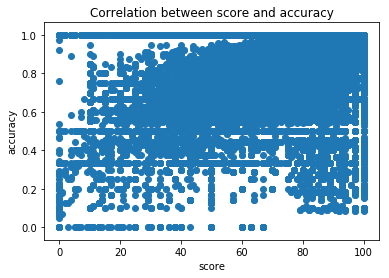

In [40]:
viz.correlation(acc_data, 'score', 'accuracy')

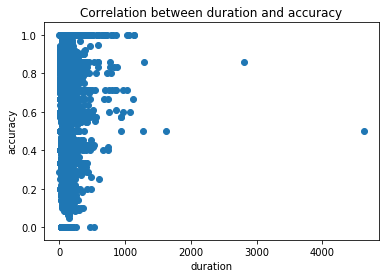

In [39]:
viz.correlation(acc_data, 'duration', 'accuracy')

### Distributions of Score and Accuracy

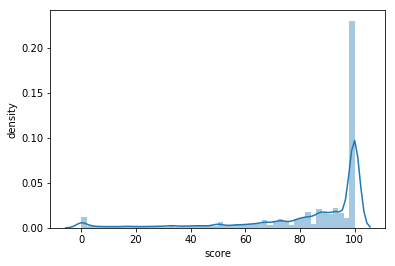

In [68]:
viz.dist(data, 'score')

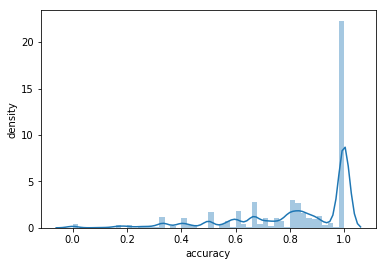

In [69]:
viz.dist(acc_data, 'accuracy')

### Mean Accuracies

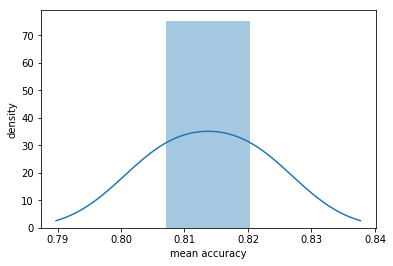

In [47]:
viz.mean_accs(acc_data, 'school_group')

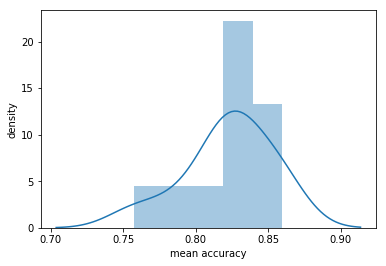

In [48]:
viz.mean_accs(acc_data, 'school')

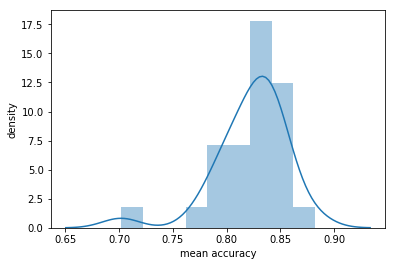

In [59]:
viz.mean_accs(acc_data, 'teacher')

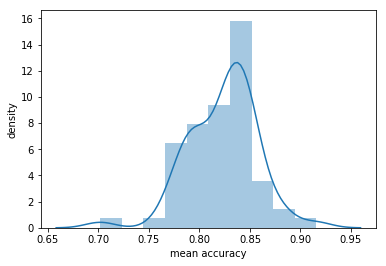

In [58]:
viz.mean_accs(acc_data, 'class')

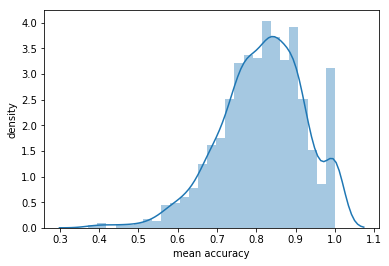

In [57]:
viz.mean_accs(acc_data, 'user')

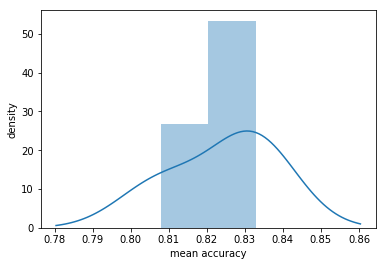

In [56]:
viz.mean_accs(acc_data, 'level')

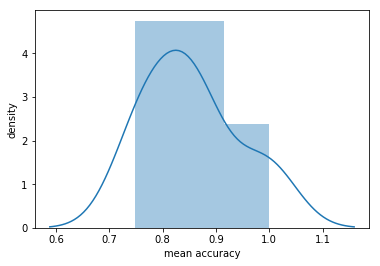

In [55]:
viz.mean_accs(acc_data, 'scoring_model')

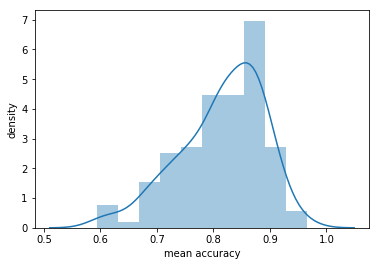

In [54]:
viz.mean_accs(acc_data, 'unit_module')

## Train/Dev/Test Split

Binning data points into time blocks, we first check the evolution of average score over time.

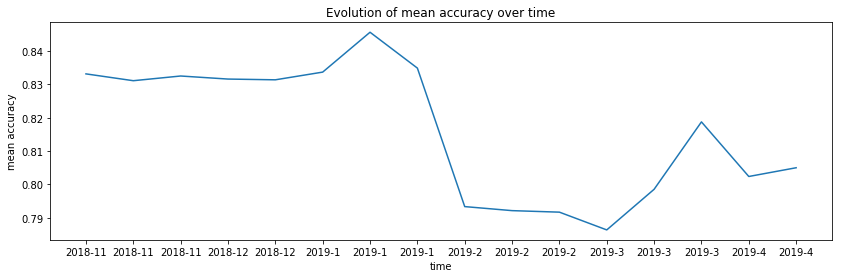

In [101]:
viz.acc_over_time(acc_data, days=10)

We need to make the training and testing distributions as similar as possible. We therefore randomly sample our data points for the validation and test sets, as opposed to taking them from the back of the dataset.

Dataset sizes:
- train: 151,749
- val: 10,000
- test: 10,000